# Quick Start - pyCityLayers

In [36]:
import numpy as np
import json
from pprint import pprint
import fiona
from shapely.geometry import Polygon, Point, MultiPolygon
from pycitylayers.client import Client
from pycitylayers.utils import PointGQL, PolygonGQL


### Create an instance of client to database

In [33]:
client = Client().create(source='cerc')

### Querying for all tables available in the database

In [34]:
tables = client.get_all_tables()
pprint(tables)

['agents',
 'agents_by_pk',
 'bixi_stations',
 'bixi_trips',
 'building_footprint_ms',
 'building_lots',
 'census_tracts',
 'dissemination_areas',
 'dissemination_blocks',
 'power_grid',
 'trees_public']


### All columns in a table

In [4]:
table = "building_lots"
columns = client.get_columns(table=table)
pprint(columns)

['borough_id',
 'building_number',
 'built_area',
 'dwelling_number',
 'firstletter_apt',
 'geom',
 'index',
 'land_area',
 'landuse_code',
 'landuse_text',
 'lastletter_apt',
 'max_floors',
 'municipality_code',
 'nad83_registration',
 'street_name',
 'street_number',
 'uid',
 'unit_category',
 'unit_number',
 'year_built']


### Get N rows from a table given a list of columns 

In [5]:
query_options = {
    'table': 'bixi_stations', 
    'columns': ['code', 'geom', 'index', 'name', 'year'], 
    'nrows': 5000, 
    'skiprows': 0,
}

data = client.get_rows( **query_options )

# pprint(data)


In [6]:
len(data['bixi_stations'])

4571

(45.35, 45.75)

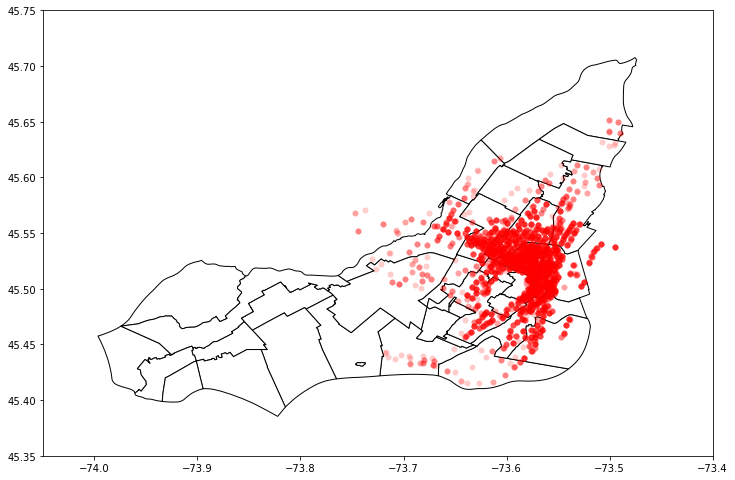

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt

list_of_points = [Point(el['geom']['coordinates']) for el in data['bixi_stations']]

gdf = gpd.GeoDataFrame(index=list(range(len(list_of_points))), crs='epsg:4326', geometry=list_of_points)

# load neighbourhood shape file
mtl_neighs = gpd.read_file('montreal_neighs.geojson')


fig, ax = plt.subplots(figsize=(12, 10))
mtl_neighs.plot(ax=ax, color=None, alpha=0.99, facecolor='white', edgecolor='black', linewidth=1)
gdf.plot(ax=ax, color='r', alpha=0.2, facecolor='red', edgecolor=None, linewidth=0)

ax.set_xlim(-74.05, -73.4)
ax.set_ylim(45.35, 45.75)



### Get N rows from a table given a list of columns and distance to a point

In [32]:
query_geometry = PointGQL().point(-73.64453315734863,45.46627091868821)
print( query_geometry )



query_options = {
    'table': 'building_lots', 
    'columns': ['index', 'built_area', 'geom'], 
    'nrows': 5000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': 0.005,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data = client.get_rows( **query_options )

# pprint(data)


{'geometry': {'type': 'Point', 'coordinates': [-73.64453315734863, 45.46627091868821], 'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}}}}


In [26]:
len(data['building_lots'])

1215

<AxesSubplot:>

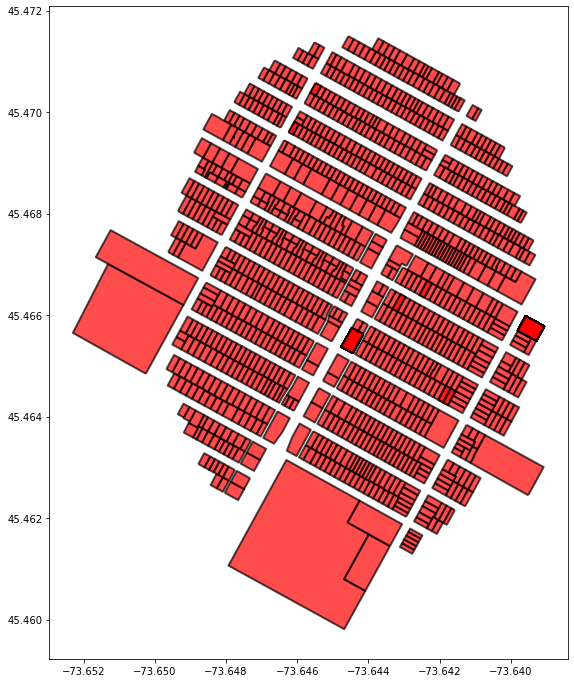

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

list_of_polygons = [Polygon([Point(el) for el in poly['geom']['coordinates'][0]]) for poly in data['building_lots']]

gdf = gpd.GeoDataFrame(index=list(range(len(data['building_lots']))), crs='epsg:4326', geometry=list_of_polygons)

gdf.plot(color='r', alpha=0.7, facecolor='white', edgecolor='black', linewidth=2, figsize=(12,12))


### Get N rows from a table given a list of columns and within a polygon

In [33]:
query_geometry = PolygonGQL().rect_from_two_corners([-73.643610,45.468896], [-73.623610,45.458896])
print( query_geometry )

query_options = {
    'table': 'building_lots', 
    'columns': ['index', 'built_area', 'geom'], 
    'nrows': 5000, 
    'skiprows': 0,
    'geometry_operation': 'is_within_poly',
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data = client.get_rows( **query_options )

# pprint(data)


{'geometry': {'type': 'Polygon', 'coordinates': [[[-73.62361, 45.458896], [-73.62361, 45.468896], [-73.64361, 45.468896], [-73.64361, 45.458896], [-73.62361, 45.458896]]], 'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}}}}


In [29]:
len(data['building_lots'])

3733

<AxesSubplot:>

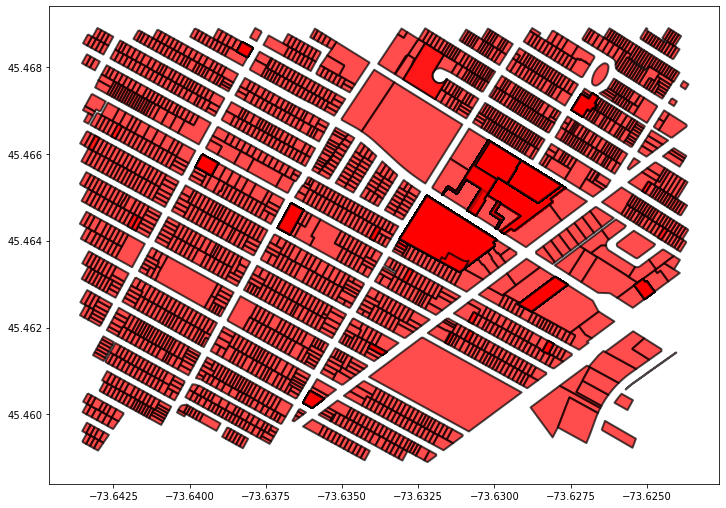

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

list_of_polygons = [Polygon([Point(el) for el in poly['geom']['coordinates'][0]]) for poly in data['building_lots']]

gdf = gpd.GeoDataFrame(index=list(range(len(data['building_lots']))), crs='epsg:4326', geometry=list_of_polygons)

gdf.plot(color='r', alpha=0.7, facecolor='white', edgecolor='black', linewidth=2, figsize=(12,12))

